In [1]:
from utils import load_data
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = load_data('data/normalized/')
X = data['X_train_valid']
y = data['y_train_valid'] - 769
print(X.shape)
print(y.shape)

(2115, 1000, 22)
(2115,)


In [3]:
def plot_channels(x, first_n=22):
    xn = np.arange(len(x))
    for i in range(first_n):
        plt.plot(xn, x[:, i])
    plt.show()

In [4]:
avg_channel_0 = np.mean(X[y == 0], axis=(0, 2))
avg_channel_1 = np.mean(X[y == 1], axis=(0, 2))
avg_channel_2 = np.mean(X[y == 2], axis=(0, 2))
avg_channel_3 = np.mean(X[y == 3], axis=(0, 2))

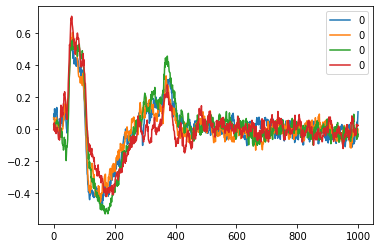

In [5]:
plt.plot(np.arange(1000), avg_channel_0, label='0')
plt.plot(np.arange(1000), avg_channel_1, label='0')
plt.plot(np.arange(1000), avg_channel_2, label='0')
plt.plot(np.arange(1000), avg_channel_3, label='0')
plt.legend(loc='best')
plt.show()

In [6]:
def plot_classes(X, y):
    for i in range(4):
        plt.plot(np.mean(X[y == i], axis=(0, 2)), label=f'{i}')
    plt.legend(loc='best')
    plt.show()

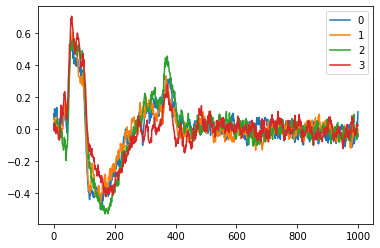

In [7]:
plot_classes(X, y)

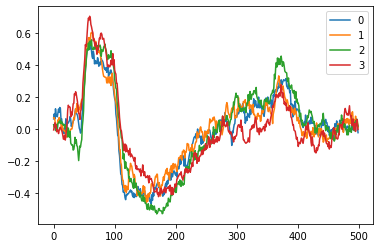

In [8]:
# trimming
X2 = X[:, 0:500, :]
plot_classes(X2, y)

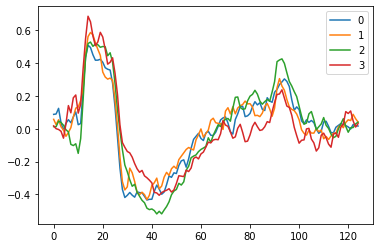

In [30]:
# temporal averaging
wnd = 4
n, seq, nf = X2.shape
X3 = X2.reshape(n, int(seq // wnd), wnd, nf)
X3 = np.mean(X3, axis=2)
plot_classes(X3, y)

In [17]:
def plot_100(X):
    fig, axs = plt.subplots(10, 10, sharex=True, sharey=True)
    fig.set_size_inches(20, 20)
    for i, x in enumerate(X[np.random.choice(len(X), size=100, replace=False)]):
        axs[i // 10, i % 10].plot(x)
    plt.show()

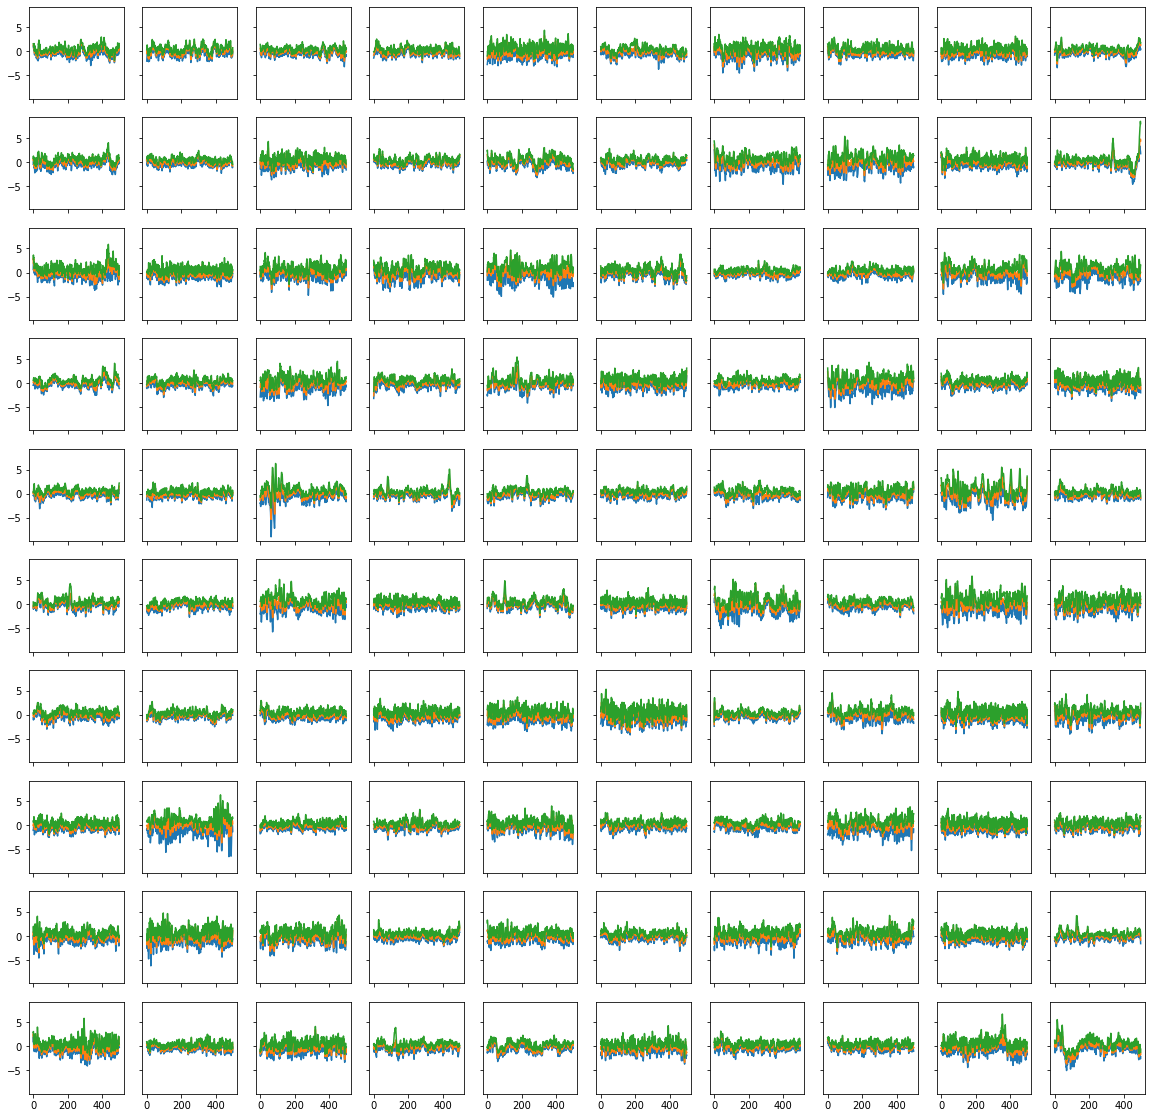

In [25]:
wnd = 2
n, seq, nf = X.shape
X4 = np.mean(X.reshape(n, seq // wnd, wnd, nf), axis=2)
X4_min_avg_max = np.stack([np.min(X4, axis=-1), np.mean(X4, axis=-1), np.max(X4, axis=-1)], axis=-1)
plot_100(X4_min_avg_max[y == 0])

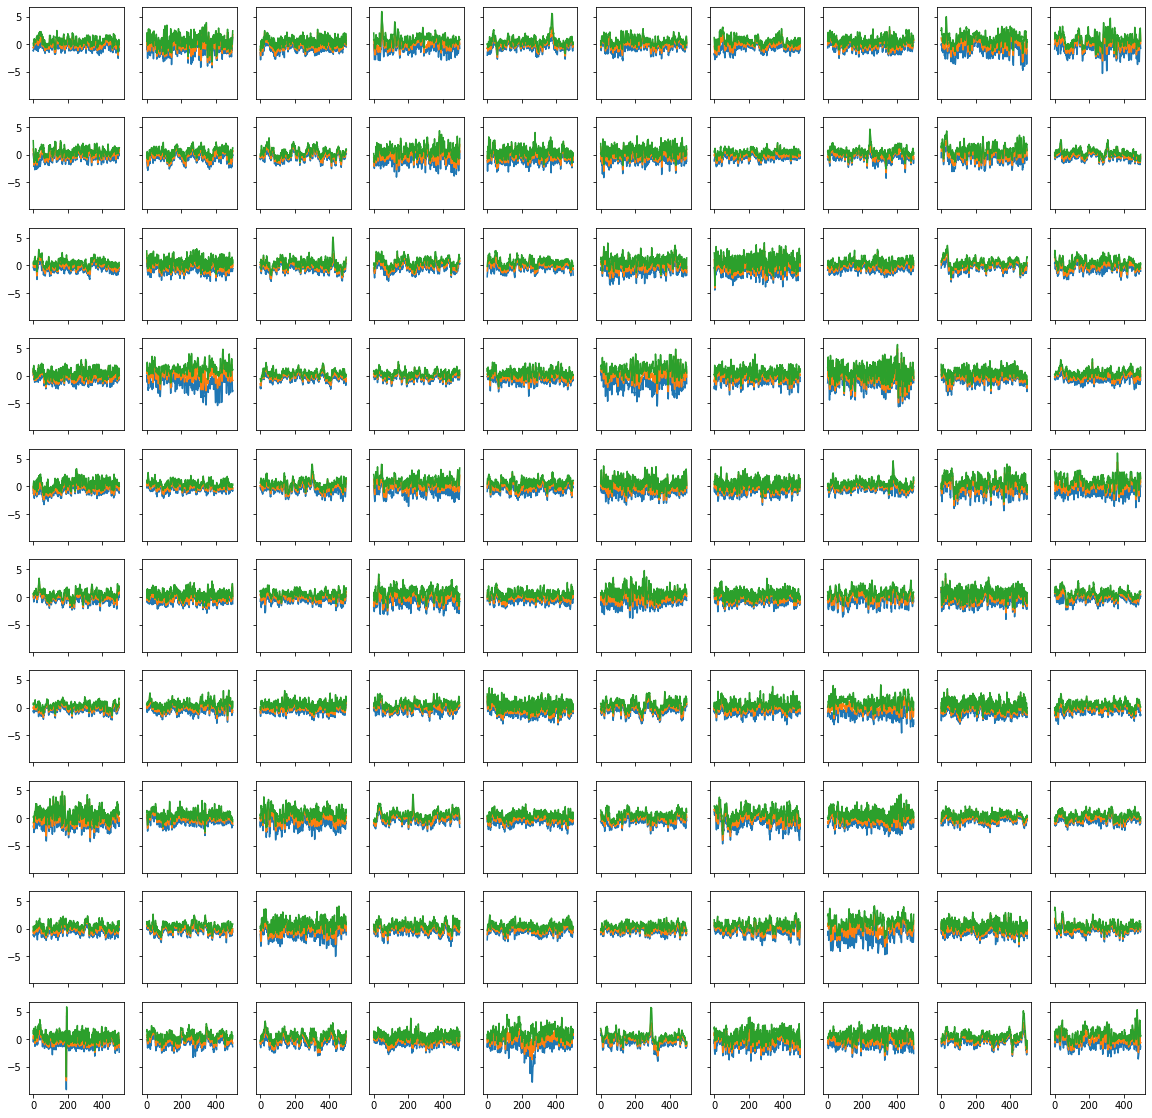

In [26]:
plot_100(X4_min_avg_max[y == 1])

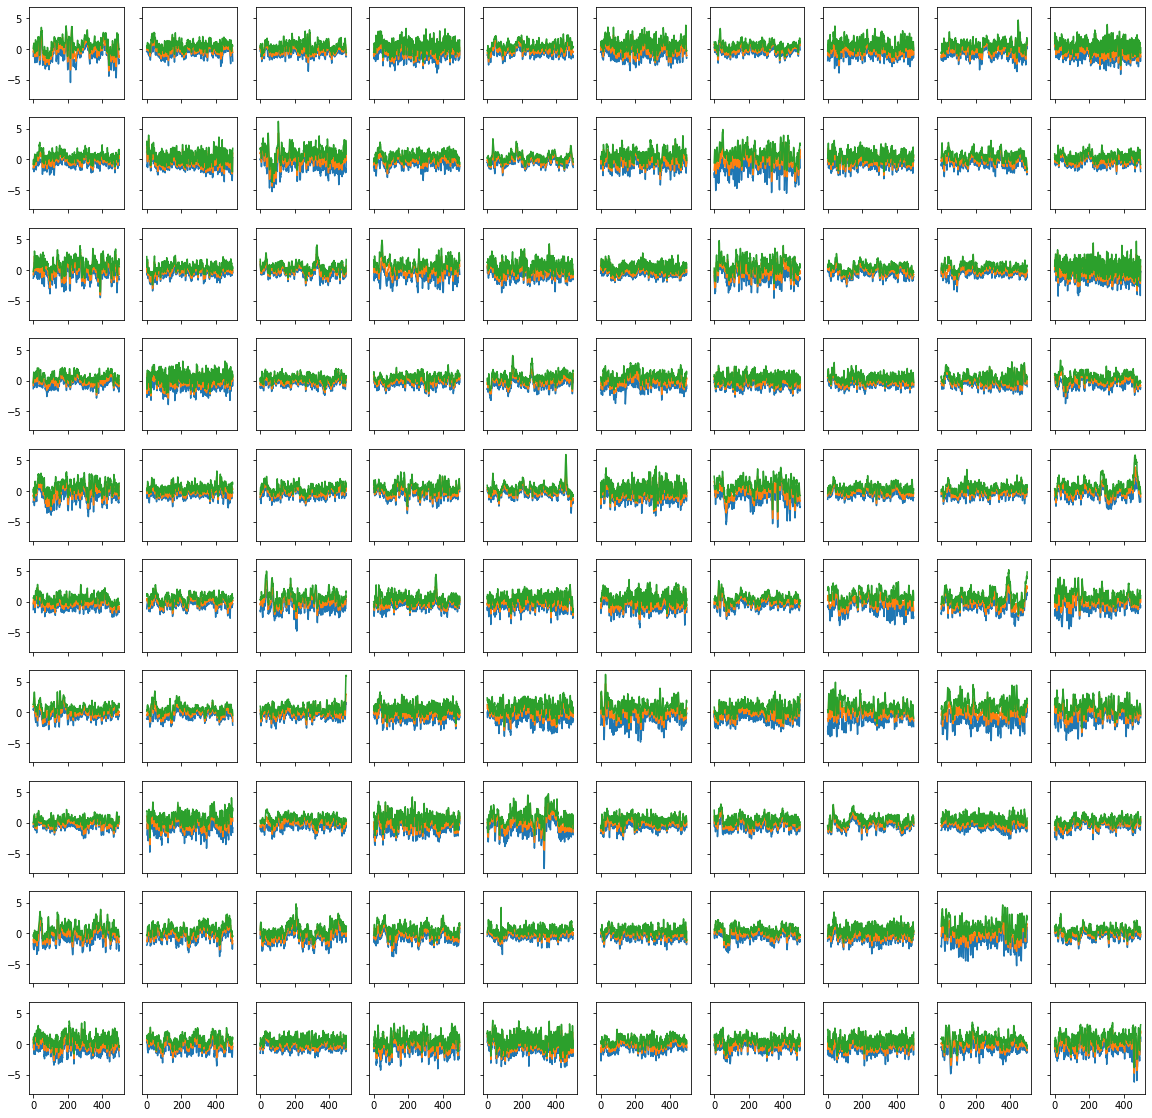

In [27]:
plot_100(X4_min_avg_max[y == 2])

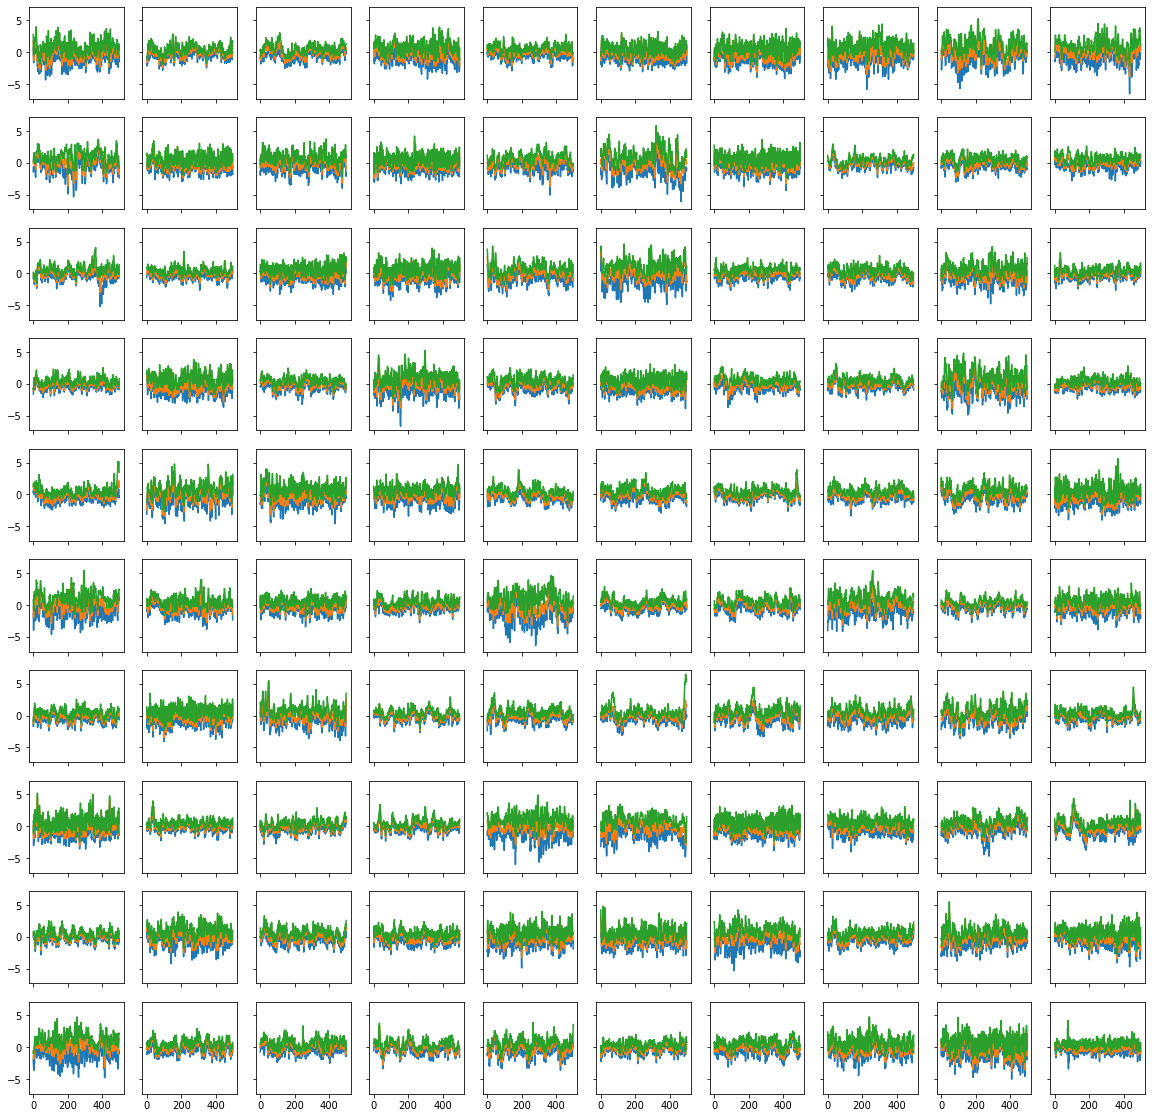

In [28]:
plot_100(X4_min_avg_max[y == 3])

In [46]:
p = 0.5
def random_interpolation(x):
    l = len(x)
    xp = np.pad(x, [(1, 1), (0, 0)], mode='edge')
    sample = np.random.choice(l, size=int(p * l), replace=False)
    xn = x + np.zeros_like(x)
    xn[sample] = (xp[sample - 1] + xp[sample + 1]) / 2
    return xn

In [33]:
def plot(x):
    plt.plot(x)
    plt.show()

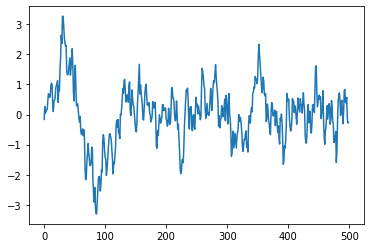

In [37]:
plot(np.mean(X4[1], axis=-1))

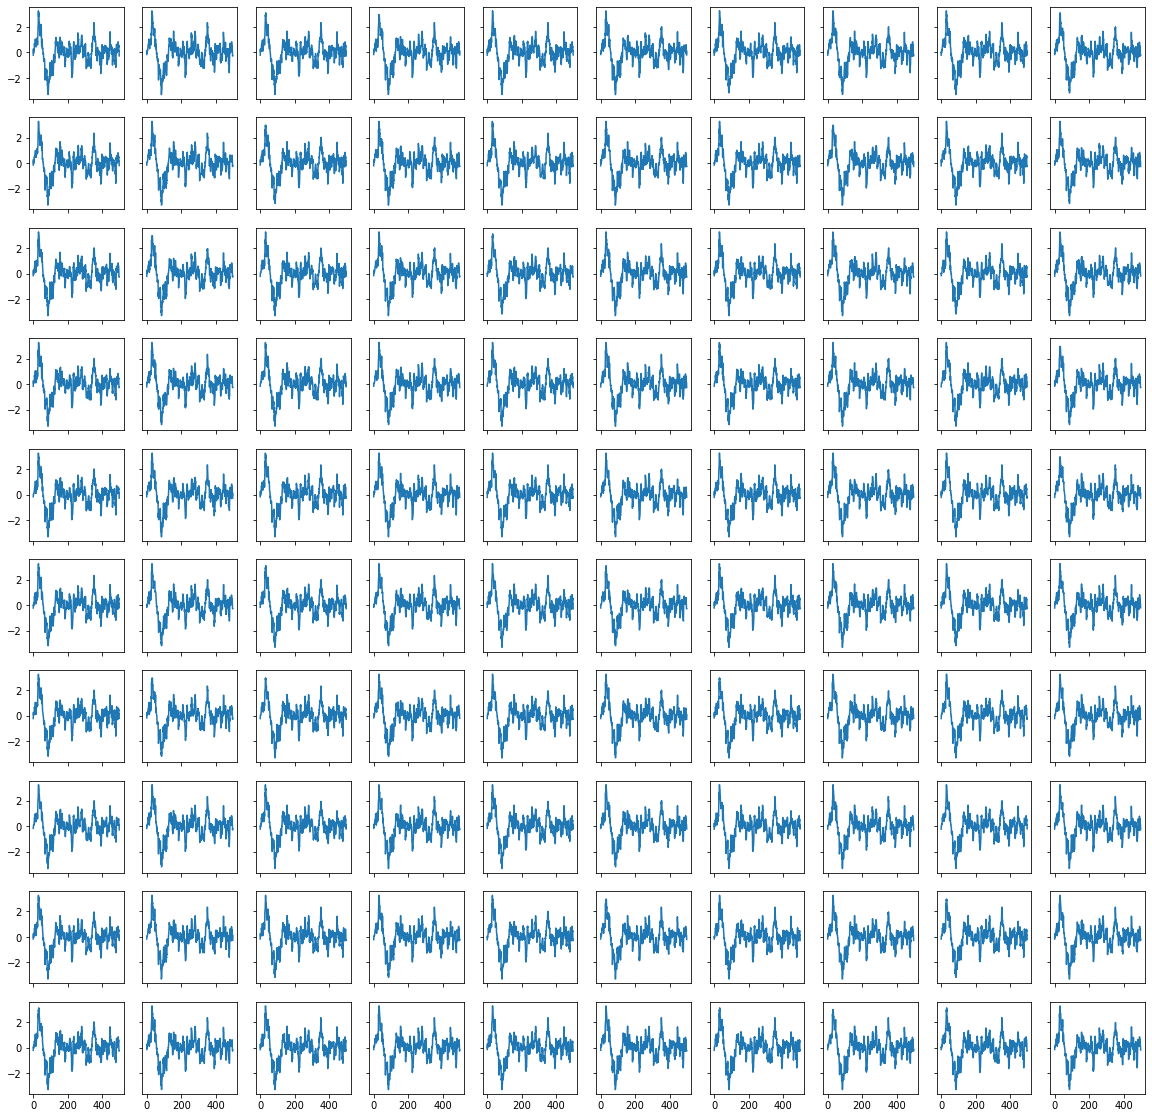

In [47]:
interps = np.array([np.mean(random_interpolation(X4[1]), axis=-1, keepdims=True) for _ in range(100)])
plot_100(interps)

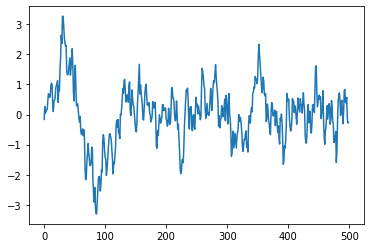

In [49]:
plot(np.mean(X4[1], axis=-1))

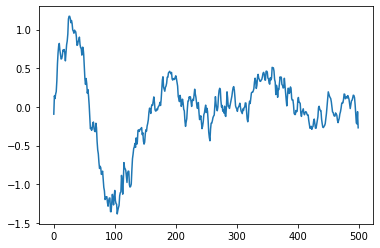

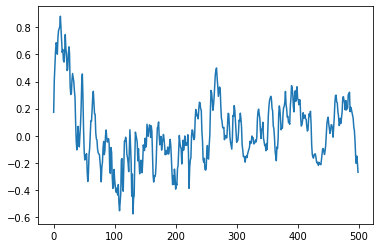

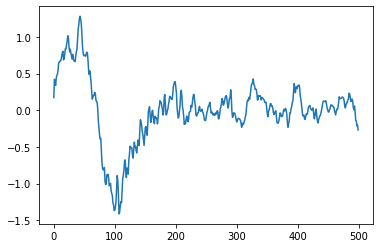

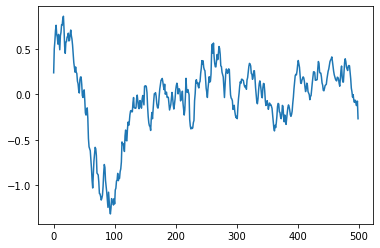

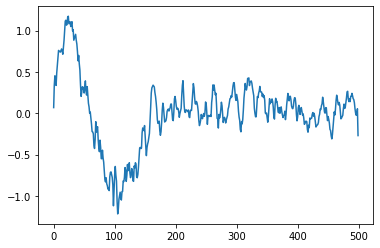

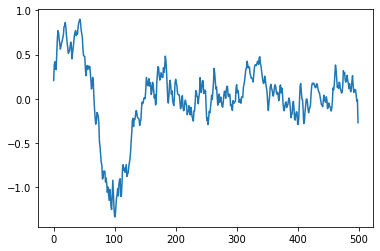

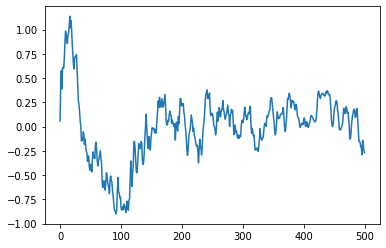

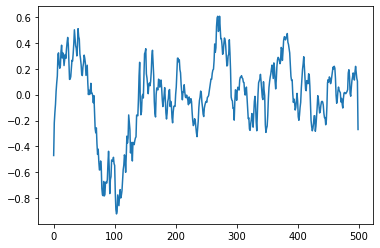

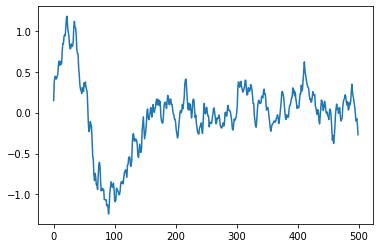

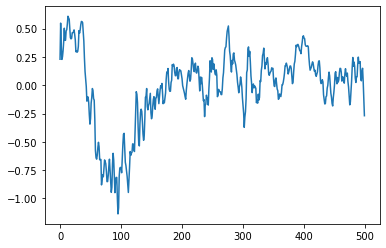

In [59]:
from aug import time_warp
for i in range(10):
    plot(np.mean(time_warp(X4[[1]]), axis=-1)[0])

(1, 500)